In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
%matplotlib inline
import warnings
import os
warnings.filterwarnings('ignore')

In [2]:
survey = pd.read_csv('./dataset/survey/BigFive.csv')

In [3]:
survey2 = survey.values[46:]
survey = survey.values[:46]
survey2 = pd.DataFrame(survey2)
survey = pd.DataFrame(survey)
survey[3][survey[3] == "Agree a little"] = 4

survey[3][survey[3] == "Disagree a little"] = 2

survey[3][survey[3] == "Neither agree nor disagree"] = 3

survey[3][survey[3] == "Disagree Strongly"] = 1

survey[3][survey[3] == "Agree strongly"] = 5

survey2[3][survey2[3] == "Agree a little"] = 4

survey2[3][survey2[3] == "Disagree a little"] = 2

survey2[3][survey2[3] == "Neither agree nor disagree"] = 3

survey2[3][survey2[3] == "Disagree Strongly"] = 1

survey2[3][survey2[3] == "Agree strongly"] = 5

In [4]:
survey = survey[survey[0].isin(survey2[0])]
print(survey)


     0    1                           2  3                           4   \
0   u00  pre              Agree a little  3  Neither agree nor disagree   
1   u01  pre  Neither agree nor disagree  4              Agree strongly   
2   u02  pre           Disagree a little  4              Agree strongly   
3   u03  pre           Disagree a little  3              Agree a little   
4   u04  pre           Disagree a little  3  Neither agree nor disagree   
5   u05  pre              Agree a little  3              Agree strongly   
6   u07  pre           Disagree a little  3              Agree strongly   
8   u09  pre           Disagree a little  1              Agree a little   
9   u10  pre           Disagree Strongly  5              Agree strongly   
12  u14  pre              Agree a little  5              Agree strongly   
13  u15  pre              Agree a little  2              Agree a little   
14  u16  pre           Disagree Strongly  4              Agree strongly   
15  u17  pre             

In [5]:
survey2 = survey2[survey2[0].isin(survey[0])]
print(survey2)

     0     1                           2  3                           4   \
0   u00  post              Agree a little  3  Neither agree nor disagree   
1   u01  post              Agree a little  4              Agree strongly   
2   u02  post           Disagree Strongly  4              Agree a little   
3   u03  post           Disagree Strongly  4              Agree a little   
4   u04  post              Agree a little  4              Agree a little   
5   u05  post  Neither agree nor disagree  3              Agree strongly   
6   u07  post  Neither agree nor disagree  1              Agree a little   
7   u09  post              Agree a little  1              Agree a little   
8   u10  post           Disagree Strongly  5              Agree strongly   
9   u14  post              Agree a little  4              Agree strongly   
10  u15  post              Agree a little  1              Agree a little   
11  u16  post           Disagree Strongly  3              Agree a little   
12  u17  pos

[0, 1, 1, 0, -2, 0, 1, 0, 0, 0, 0, 0, -1, 1, -1, 0, 1, 0, -1, -1, 1, 0, 1, 0, 0, 0, -1, 1, 0, -1]
[2.6000000000000001, 1.0909090909090908, 1.875, 1.0, 2.3846153846153846, 1.0, 4.5999999999999996, 1.8888888888888888, 1.1818181818181819, 1.0, 2.0, 1.52, 1.868421052631579, 1.1428571428571428, 1.7, 1.6666666666666667, 4.083333333333333, 1.2941176470588236, 1.0, 1.1904761904761905, 2.7727272727272729, 1.3333333333333333, 2.6666666666666665, 1.1470588235294117, 2.0, 1.6666666666666667, 3.0, 2.4583333333333335, 1.3999999999999999, 1.3600000000000001]


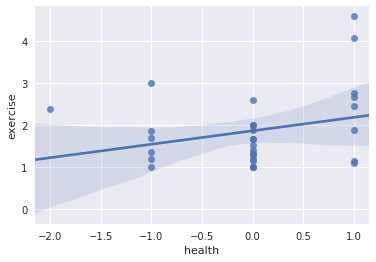

In [37]:
#print(list(survey2[3]))
#print(survey[3])
health_frame = pd.Series(np.array(survey2[3])-np.array(survey[3])).rename_axis(survey[0])
#print(health_frame.axes)
#print(survey[0])
#dat = pd.DataFrame()
average_exercise = []
health = []
for i in os.listdir("./dataset/EMA/response/Exercise/"):
    #print(i[9:-5])
#    dat[i[9:-5]] = pd.Series(sum(pd.read_json("./dataset/EMA/response/Exercise/"+ i)['exercise'])/len(pd.read_json("./dataset/EMA/response/Exercise/"+ i)['exercise']))
    #print(health_frame.isin([i[9:-5]]))
    if (i[9:-5] in health_frame.axes[0]):
        average_exercise.append(sum(pd.read_json("./dataset/EMA/response/Exercise/"+ i)['exercise'])/len(pd.read_json("./dataset/EMA/response/Exercise/"+ i)['exercise']))
        health.append(health_frame.loc[i[9:-5]])
    #print(sum(pd.read_json("./dataset/EMA/response/Exercise/"+ i)['exercise'])/len(pd.read_json("./dataset/EMA/response/Exercise/"+ i)['exercise']))
    #print(type(pd.read_json("./dataset/EMA/response/Exercise/"+ i)['exercise']))
#print(dat)
print(health)
print(average_exercise)
plot = pd.DataFrame({'health':health, 'exercise':average_exercise})
ax = sns.regplot(x='health', y='exercise', data=plot)